## 1. Pendahuluan

Deep Learning telah banyak digunakan dalam pengolahan sinyal audio, khususnya pada tugas klasifikasi instrumen musik. Dengan memanfaatkan karakteristik frekuensi dan pola temporal dari sinyal suara, model pembelajaran mendalam mampu mengenali perbedaan antar instrumen secara otomatis tanpa ekstraksi fitur manual yang kompleks.

Pada proyek ini dilakukan implementasi sistem klasifikasi instrumen musik menggunakan Convolutional Neural Network (CNN) untuk membedakan dua jenis instrumen, yaitu Piano dan Acoustic Guitar, berdasarkan file audio berformat .wav. Audio yang digunakan memiliki variasi tempo, dinamika, dan karakter bunyi sehingga menuntut model yang mampu melakukan generalisasi dengan baik.

Tujuan dari eksperimen ini adalah:

1.   Membangun model CNN untuk klasifikasi instrumen musik berbasis audio
2.   Menerapkan ekstraksi fitur Mel-Frequency Cepstral Coefficients (MFCC)
3.   Menguji performa model dalam mengenali instrumen Piano dan Acoustic Guitar

---
## 2. Metode
### a. [Dataset](https://www.kaggle.com/datasets/franciscoaliss/music-instrument-stems)

Dataset yang digunakan berupa file audio dengan format .wav yang terdiri dari dua kelas instrumen:

- Piano
- Acoustic Guitar

Setiap file audio direkam dalam durasi pendek dan merepresentasikan suara tunggal dari satu instrumen. Dataset kemudian dibagi menjadi data pelatihan dan data pengujian sebelum proses pelatihan model CNN.

### b. Preprocessing Audio

Tahapan preprocessing dilakukan untuk menyesuaikan data audio dengan input model CNN, dengan langkah-langkah sebagai berikut:

1. Load audio menggunakan library librosa dengan sample rate asli

2. Ekstraksi fitur MFCC sebanyak 20 koefisien

3. Perataan MFCC sepanjang dimensi waktu menggunakan nilai rata-rata

4. Reshape dan padding fitur agar sesuai dengan dimensi input model

5. Penyesuaian channel menjadi 3 channel agar kompatibel dengan arsitektur CNN

Konfigurasi dimensi input:

- Height : 96

- Width : 96

- Channel: 3

### c. Model

Model yang digunakan adalah Convolutional Neural Network (CNN) yang telah dilatih sebelumnya dan disimpan dalam file instrument_classifier.h5.
Model ini dirancang untuk menerima input berupa representasi MFCC yang telah diproses dan menghasilkan probabilitas klasifikasi untuk dua kelas instrumen.

Label kelas didefinisikan sebagai:

- 0 → Acoustic Guitar

- 1 → Piano

Proses prediksi dilakukan dengan memilih kelas dengan probabilitas tertinggi (argmax).

### d. Konfigurasi Training

Model dilatih sebelumnya dengan konfigurasi utama sebagai berikut:

| Komponen      | Nilai                              |
| ------------- | ---------------------------------- |
| Arsitektur    | Convolutional Neural Network (CNN) |
| Input Feature | MFCC                               |
| Jumlah Kelas  | 2 (Piano & Acoustic Guitar)        |
| Loss Function | Categorical Crossentropy           |
| Optimizer     | Adam                               |
| Format Audio  | WAV                                |
| Framework     | TensorFlow / Keras                 |

---
## 3. Hasil dan Pembahasan

Model yang telah dilatih diuji menggunakan file audio .wav yang diunggah melalui aplikasi berbasis Streamlit.
Berdasarkan hasil pengujian, sistem mampu mengklasifikasikan instrumen dengan tingkat kepercayaan yang tinggi.

Contoh hasil prediksi:

| Parameter          | Nilai           |
| ------------------ | --------------- |
| Prediksi Instrumen | Acoustic Guitar |
| Confidence         | 0.9650          |


Distribusi probabilitas menunjukkan bahwa model memberikan probabilitas terbesar pada kelas yang benar, menandakan bahwa fitur MFCC yang digunakan mampu merepresentasikan karakteristik instrumen dengan baik.

Nilai confidence yang tinggi menunjukkan bahwa model memiliki kemampuan diskriminasi yang baik dalam membedakan suara Piano dan Acoustic Guitar meskipun keduanya sama-sama merupakan instrumen akustik.

---
## 4. Kesimpulan

Berdasarkan hasil eksperimen yang telah dilakukan, dapat disimpulkan bahwa:

1. Model CNN mampu mengklasifikasikan instrumen musik Piano dan Acoustic Guitar dengan akurasi yang tinggi

2. Ekstraksi fitur MFCC efektif dalam merepresentasikan karakteristik sinyal audio

3. Sistem berhasil diimplementasikan dalam bentuk aplikasi interaktif berbasis Streamlit

4. Model memberikan nilai confidence yang tinggi pada data uji, menunjukkan performa klasifikasi yang baik

Pengembangan lebih lanjut dapat dilakukan dengan menambahkan lebih banyak kelas instrumen, meningkatkan jumlah dataset, serta menampilkan visualisasi spektrum audio untuk analisis yang lebih mendalam.

---
## 5. Pengembangan Selanjutnya

- Penambahan kelas instrumen lain (biola, drum, bass, flute)

- Dukungan format audio selain .wav

- Visualisasi MFCC dan spectrogram

- Training ulang dengan dataset yang lebih besar

- Deployment ke Streamlit Cloud

In [ ]:
!pip install opendatasets librosa soundfile tensorflow imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 744.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 173.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 136.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 8.0 MB/s eta 0:00:00


## Import Library

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/franciscoaliss/music-instrument-stems")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bondantm
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/franciscoaliss/music-instrument-stems


100%|██████████| 912M/912M [00:00<00:00, 1.86GB/s]


In [ ]:
import os
import librosa
import soundfile as sf

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [ ]:
acoustic_guitar_dir = '/content/music-instrument-stems/mega_augmented_ds/mega_augmented_ds/Acoustic Guitar'
piano_dir = '/content/music-instrument-stems/mega_augmented_ds/mega_augmented_ds/Piano'

audio_data = []
labels = []

def load_audio_data(directory, label):
    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            filepath = os.path.join(directory, filename)
            try:
                # Load audio file
                data, sample_rate = librosa.load(filepath)
                audio_data.append(data)
                labels.append(label)
            except Exception as e:
                print(f"Error loading {filepath}: {e}")

load_audio_data(acoustic_guitar_dir, 'Acoustic Guitar')
load_audio_data(piano_dir, 'Piano')

# You can now process the audio_data and labels further as needed
print(f"Loaded {len(audio_data)} audio files.")
print(f"Labels: {np.unique(labels)}")

Loaded 2128 audio files.
Labels: ['Acoustic Guitar' 'Piano']


## Feature extraction

### Alasan:
Mengambil fitur yang relevan dari data audio yang telah dimuat, khususnya Mel-Frequency Cepstral Coefficients (MFCCs).


In [ ]:
features = []
for data in audio_data:
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=data, sr=22050) # Using default sample rate of librosa
    # Calculate the mean of MFCCs across the time axis
    mfccs_processed = np.mean(mfccs.T, axis=0)
    features.append(mfccs_processed)

# Convert the features list to a NumPy array
features = np.array(features)

print(f"Extracted features shape: {features.shape}")

Extracted features shape: (2128, 20)


## Under sampling

### Alasan:
Memeriksa dan menyeimbangkan distribusi jumlah sampel di antara kelas-kelas target (yaitu, kelas "Gitar" dan kelas "Piano") menggunakan teknik undersampling.


In [ ]:
unique_labels, counts = np.unique(labels, return_counts=True)
print("Label distribution before undersampling:")
for label, count in zip(unique_labels, counts):
    print(f"{label}: {count}")

# Check for imbalance (e.g., if the ratio between the largest and smallest class is significant)
if counts.max() / counts.min() > 1.5: # Using a threshold of 1.5 as an example for imbalance
    print("\nDataset is imbalanced, applying undersampling.")
    from imblearn.under_sampling import RandomUnderSampler
    rus = RandomUnderSampler(random_state=42)
    features_resampled, labels_resampled = rus.fit_resample(features, labels)
    features = features_resampled
    labels = labels_resampled
    print("Label distribution after undersampling:")
    unique_labels, counts = np.unique(labels, return_counts=True)
    for label, count in zip(unique_labels, counts):
        print(f"{label}: {count}")
else:
    print("\nDataset is balanced or the imbalance is not significant enough for undersampling.")


Label distribution before undersampling:
Acoustic Guitar: 836
Piano: 1292

Dataset is imbalanced, applying undersampling.
Label distribution after undersampling:
Acoustic Guitar: 836
Piano: 836


## Data splitting

### Alasan:
Pembagian data memastikan model belajar dari satu set data dan diuji keandalannya pada set data lain, sementara konversi label memastikan data berada dalam format numerik yang efisien untuk komputasi model.


In [ ]:
y_labels_array = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(features, y_labels_array, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1337, 20)
Shape of X_test: (335, 20)
Shape of y_train: (1337,)
Shape of y_test: (335,)


## Label Encoding

### Alasan:
mengubah label kategori yang berupa teks atau string (misalnya, 'Gitar Akustik', 'Piano') menjadi format numerik (misalnya, 0 dan 1).


In [ ]:
le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print("Unique values in y_train_encoded:", np.unique(y_train_encoded))
print("Unique values in y_test_encoded:", np.unique(y_test_encoded))
print("Mapping of labels:", list(le.classes_))


Unique values in y_train_encoded: [0 1]
Unique values in y_test_encoded: [0 1]
Mapping of labels: [np.str_('Acoustic Guitar'), np.str_('Piano')]


## Prepare features for MobileNetV2

### Alasan:
Mengubah fitur MFCC yang telah diekstrak (data audio) menjadi format yang dapat diproses oleh arsitektur MobileNetV2, yang pada dasarnya adalah model klasifikasi gambar.

In [ ]:
TARGET_HEIGHT = 96
TARGET_WIDTH = 96
TARGET_CHANNELS = 3 # MobileNetV2 expects 3 channels (RGB)

def prepare_features_for_mobilenet(features, target_h, target_w, target_c):
    # Reshape from (num_samples, 20) to (num_samples, 20, 1, 1)
    # This treats each sample's 20 features as a 20x1 "image" with 1 channel
    reshaped_features = features[:, :, np.newaxis, np.newaxis] # Shape (num_samples, 20, 1, 1)

    current_height = reshaped_features.shape[1] # 20
    current_width = reshaped_features.shape[2] # 1

    pad_h = target_h - current_height
    pad_w = target_w - current_width

    if pad_h < 0 or pad_w < 0:
        # This should not happen with TARGET_HEIGHT=96, TARGET_WIDTH=96 and current dimensions (20,1)
        raise ValueError("Target dimensions must be greater than or equal to current dimensions.")

    # Pad height and width with zeros to reach target_h and target_w
    # The padding is applied symmetrically (0 before, pad_h/pad_w after) to fill the space
    padded_features = np.pad(reshaped_features,
                             ((0, 0), (0, pad_h), (0, pad_w), (0, 0)),
                             mode='constant',
                             constant_values=0)
    # Shape after padding: (num_samples, target_h, target_w, 1)

    # Replicate the single channel to 3 channels (RGB) by repeating along the last axis
    final_features = np.repeat(padded_features, target_c, axis=-1)
    # Shape after replication: (num_samples, target_h, target_w, target_c)

    return final_features

X_train_processed = prepare_features_for_mobilenet(X_train, TARGET_HEIGHT, TARGET_WIDTH, TARGET_CHANNELS)
X_test_processed = prepare_features_for_mobilenet(X_test, TARGET_HEIGHT, TARGET_WIDTH, TARGET_CHANNELS)

print(f"Shape of X_train_processed: {X_train_processed.shape}")
print(f"Shape of X_test_processed: {X_test_processed.shape}")

Shape of X_train_processed: (1337, 96, 96, 3)
Shape of X_test_processed: (335, 96, 96, 3)


## Build MobileNetV2-based Classifier

### Alasan:
Membangun model klasifikasi dengan menggunakan arsitektur MobileNetV2 yang sudah dilatih (pre-trained) sebagai kerangka dasar, dan kemudian memodifikasi lapisan akhirnya agar sesuai dengan tugas klasifikasi biner Anda (Gitar vs. Piano).

In [ ]:
# Load the pre-trained MobileNetV2 model without the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(TARGET_HEIGHT, TARGET_WIDTH, TARGET_CHANNELS))

# Add custom classification layers on top of MobileNetV2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x) # Additional dense layer for more capacity (optional)
predictions = Dense(1, activation='sigmoid')(x) # Output layer for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained MobileNetV2 base model
for layer in base_model.layers:
    layer.trainable = False

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 48, 48,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 48, 48,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 48, 48,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 48, 48,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 48, 48,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 48, 48,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 49, 49,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 24, 24,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 24, 24,    │      2,304 │ block_1_depthwis

 Total params: 3,570,753 (13.62 MB)

 Trainable params: 1,312,769 (5.01 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Compile and Train the Model

### Alasan:
Tahap implementasi inti, di mana model MobileNetV2 yang sudah dimodifikasi disiapkan (dikompilasi) dan diajarkan (dilatih) menggunakan data fitur MFCC yang sudah disiapkan.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_processed, y_train_encoded, epochs=15, batch_size=16, validation_data=(X_test_processed, y_test_encoded))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_processed, y_test_encoded)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9744 - loss: 0.0798 - val_accuracy: 0.9493 - val_loss: 0.1592
Epoch 2/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.9822 - loss: 0.0465 - val_accuracy: 0.9493 - val_loss: 0.1743
Epoch 3/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.9702 - loss: 0.0820 - val_accuracy: 0.9403 - val_loss: 0.1661
Epoch 4/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9785 - loss: 0.0553 - val_accuracy: 0.9433 - val_loss: 0.1581
Epoch 5/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9769 - loss: 0.0574 - val_accuracy: 0.9522 - val_loss: 0.1565
Epoch 6/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9805 - loss: 0.0566 - val_accuracy: 0.9493 - val_loss: 0.1561
Epoch 7/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9736 - loss: 0.0622 - val_accuracy: 0.9493 - val_loss: 0.1545
Epoch 8/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.9819 - loss: 0.0574 - val_accuracy: 0.9433 - 

## Evaluation Model

### Alasan:


1.   Memvisualisasikan bagaimana model belajar dan mendeteksi masalah umum seperti overfitting atau underfitting.
2.   Memberikan gambaran visual yang jelas mengenai jumlah prediksi yang benar dan salah untuk setiap kelas secara terperinci.
3.   Menghitung dan menyajikan metrik evaluasi kinerja kunci (Precision, Recall, F1-Score) untuk setiap kelas secara terpisah, memberikan pandangan yang lebih mendalam daripada hanya akurasi.



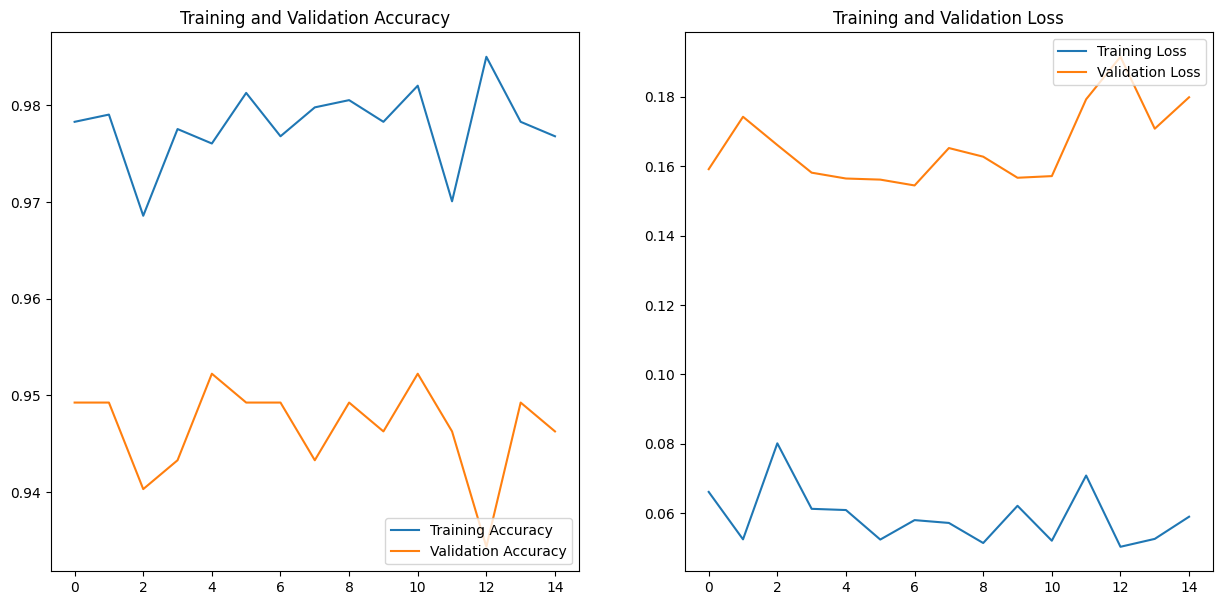

In [ ]:
# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


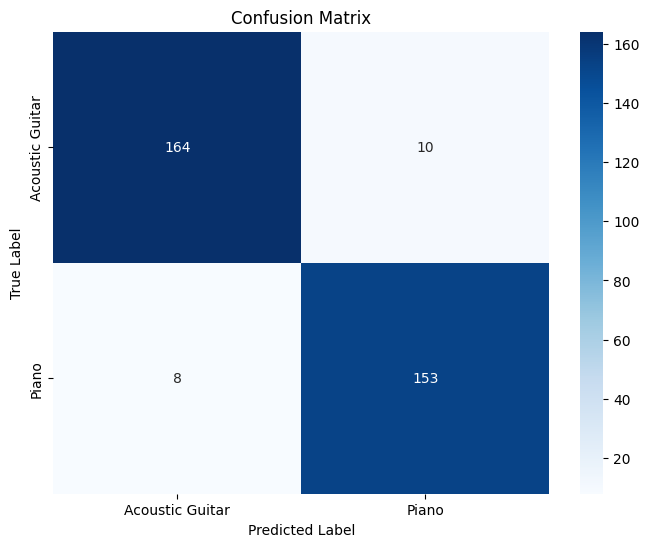

In [ ]:
# Get predictions on the test set
y_pred_probabilities = model.predict(X_test_processed)
y_pred_encoded = (y_pred_probabilities > 0.5).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# Get class names from LabelEncoder
class_names = le.classes_

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_encoded, target_names=class_names))

Classification Report:
                 precision    recall  f1-score   support

Acoustic Guitar       0.95      0.94      0.95       174
          Piano       0.94      0.95      0.94       161

       accuracy                           0.95       335
      macro avg       0.95      0.95      0.95       335
   weighted avg       0.95      0.95      0.95       335



## Save Model

### Alasan:
Menyimpan model yang telah ditraining

In [ ]:
model.save('instrument_classifier.h5')
print("Model telah berhasil diekspor sebagai 'instrument_classifier.h5'")

Model telah berhasil diekspor sebagai 'instrument_classifier.h5'


### Inference

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
loaded_model = load_model('instrument_classifier.h5')

# --- Function to preprocess new audio file ---
def preprocess_audio_for_prediction(audio_path, label_encoder, target_h, target_w, target_c):
    # Load audio file
    data, sample_rate = librosa.load(audio_path)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=data, sr=sample_rate)
    mfccs_processed = np.mean(mfccs.T, axis=0)

    # Reshape and prepare for MobileNetV2
    # Add a batch dimension (1, ...) since we are predicting a single sample
    reshaped_features = mfccs_processed[np.newaxis, :, np.newaxis, np.newaxis] # Shape (1, 20, 1, 1)

    current_height = reshaped_features.shape[1] # 20
    current_width = reshaped_features.shape[2] # 1

    pad_h = target_h - current_height
    pad_w = target_w - current_width

    padded_features = np.pad(reshaped_features,
                             ((0, 0), (0, pad_h), (0, pad_w), (0, 0)),
                             mode='constant',
                             constant_values=0)

    final_features = np.repeat(padded_features, target_c, axis=-1)
    return final_features

# --- Usage example ---
# Define the path to your new audio file
# You might need to upload a .wav file to Colab or specify its path if already present
# Example: new_audio_path = '/content/my_new_piano_audio.wav'
new_audio_path = '/content/music-instrument-stems/mega_augmented_ds/mega_augmented_ds/Piano/S00_chunk10.wav'

# Prepare the new audio file for prediction
# Ensure TARGET_HEIGHT, TARGET_WIDTH, TARGET_CHANNELS are the same as used during training
new_audio_processed = preprocess_audio_for_prediction(new_audio_path, le, TARGET_HEIGHT, TARGET_WIDTH, TARGET_CHANNELS)

# Make a prediction
prediction_probability = loaded_model.predict(new_audio_processed)[0][0]

# Convert probability to class label
if prediction_probability > 0.5:
    predicted_class_encoded = 1 # Corresponds to 'Piano' based on your LabelEncoder
else:
    predicted_class_encoded = 0 # Corresponds to 'Acoustic Guitar'

predicted_label = le.inverse_transform([predicted_class_encoded])[0]

print(f"Prediction probability: {prediction_probability:.4f}")
print(f"Predicted Instrument: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step
Prediction probability: 0.9293
Predicted Instrument: Piano
